In [29]:
import os
import gdal
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from rasterio import features, coords, plot
import rasterio
from shapely.geometry import shape
from geopy import distance
%matplotlib inline

# https://gis.stackexchange.com/questions/151339/rasterize-a-shapefile-with-geopandas-or-fiona-python
ROOT_DIR = "/home/rave/deeplearn_imagery/data/raw/stephtest/"
os.chdir(ROOT_DIR)
WV2_LABEL_DIR = 'merged_digitized_labels_raster_extents/'
WV2_IMAGERY_DIR = 'projectedtiffs/'
GRID_PATH = 'wv2_boxes.shp'
RASTERIZED_PATH = 'rasterized_wv2_labels/'
OUT_PATH = 'gridded_wv2_labels/'
# all files, only the projected images
items = os.listdir(WV2_LABEL_DIR)

merged_list = []
for name in items:
    if name.endswith(".shp"):
        merged_list.append(WV2_LABEL_DIR+name)  

def takefirst(elem):
    return int(elem[-10])

shp_list = sorted(merged_list, key=takefirst)
frames_list = []
for shp_path in shp_list:
    
    shp_frame = gpd.read_file(shp_path)
    shp_frame['file_id'] = shp_path[-10]
    frames_list.append(shp_frame)
    
all_fields = pd.concat(frames_list)

#removing data mask
all_fields = all_fields[all_fields['DN']!=1]

In [17]:
all_fields.columns

Index(['OBJECTID', 'DN', 'id', 'class', 'Shape_Leng', 'Shape_Area', 'geometry',
       'file_id'],
      dtype='object')

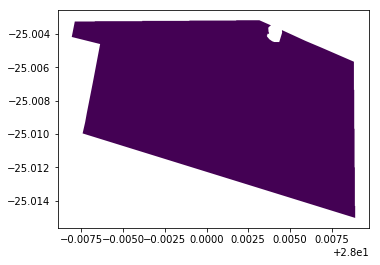

In [31]:
all_fields[all_fields['Shape_Area']>.00014].plot(column='Shape_Area')

In [32]:
all_fields[all_fields['Shape_Area']>.00014]

,OBJECTID,DN,id,class,Shape_Leng,Shape_Area,geometry,file_id
71,72,0,903,2,0.053804,0.000141,POLYGON ((28.00883948215642 -25.00566316072621...,2
